<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Politécnica_Salesiana_del_Ecuador.png" width="90%">
<h2>Práctica 1:
    Visualización de X-Shape </h2>
<h3>Estudiante: Andrés Alba </h3>

### Datasaurus Dozen
Es un conjunto de datasets que fueron creados por el investigador de datos Alberto Cairo. Donde cada uno de estos datasets tiene la misma estadística descriptiva media, mediana, etc. pero tienen formas muy diferentes cuando se grafican. El propósito del conjunto de datos es mostrar cómo la visualización de datos puede ser engañosa si solo se confía en los resúmenes estadísticos estándar. 

### X-Shape
El dataset tiene forma de X cuando se gráfica en 2 dimensiones.

##### Importan las librerias
- pandas: Trabajar con dataframes

- matplotlib: para visualizar los datos

- sklearn: para hacer un modelo de regresión Lineal y Polinomial

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

Realizamos la carga del Datasaurus y lo imprimimos.

Vemos que tenemos 3 columnas el nombre del dataset, punto en X y punto en Y

In [23]:
data = pd.read_csv("../data/DatasaurusDozen.tsv", sep='\t')
data

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


Separamos el dataset que vamos analizar extrayendo en un nuevo dataframe los datos que pertenezcan al X-Shape, y aparte para comprobar de lo que investigamos que comparten la misma estadistica descriptiva extraeremos tambien el dataset dino para compararlos

In [28]:
x_shape_datasets = data[data['dataset'].str.contains('x_shape')]
dino_dataset = data[data['dataset'].str.contains('dino')]
x_shape_datasets

,dataset,x,y
568,x_shape,38.337757,92.472719
569,x_shape,35.751871,94.116768
570,x_shape,32.767218,88.518295
571,x_shape,33.729607,88.622266
572,x_shape,37.238249,83.724928
...,...,...,...
705,x_shape,34.794594,13.969683
706,x_shape,79.221764,22.094591
707,x_shape,36.030880,93.121733
708,x_shape,34.499558,86.609985


### Realizamos la estadistica descriptiva

Y efectivamente comprobamos que la media, y la desviación estandar llegan a ser exactamente las mismas.

In [33]:
print ('------Dataset X-Shape------')
print (x_shape_datasets.describe())
print ('------ Dataset Dino------')
print (dino_dataset.describe())


------Dataset X-Shape------
                x           y
count  142.000000  142.000000
mean    54.260150   47.839717
std     16.769958   26.930002
min     31.106867    4.577661
25%     40.091656   23.470809
50%     47.136458   39.876211
75%     71.856923   73.609634
max     85.446186   97.837615
------ Dataset Dino------
                x           y
count  142.000000  142.000000
mean    54.263273   47.832253
std     16.765142   26.935403
min     22.307700    2.948700
25%     44.102600   25.288450
50%     53.333300   46.025600
75%     64.743600   68.525675
max     98.205100   99.487200


### Realizamos la visualización del dataset X-Shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_16260\459870386.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


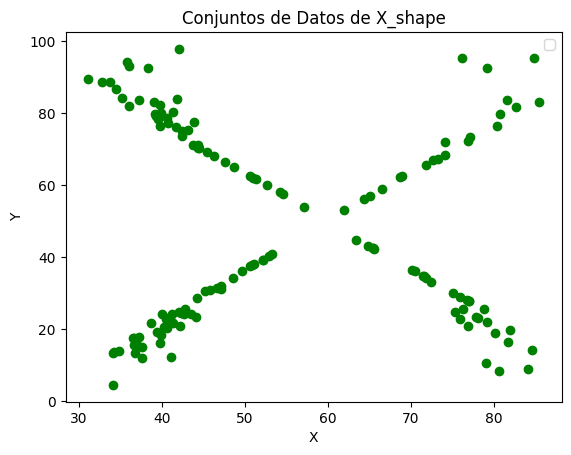

In [34]:
plt.figure()

for idx, dataset in x_shape_datasets.iterrows():
    x = dataset['x']
    y = dataset['y']
    
    plt.scatter(x, y, label=None, color='green')  
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjuntos de Datos de X_shape')
plt.legend()
plt.show()

### REGRESION LINEAL

Ahora en base a los puntos del dataset realizaremos un modelo de regresión lineal y polinomial.

In [35]:
x = x_shape_datasets[['x']]
y = x_shape_datasets['y'] 
MRL = LinearRegression()
MRL.fit(x, y)

y_pred = MRL.predict(x)

### REGRESION CUADRATICA

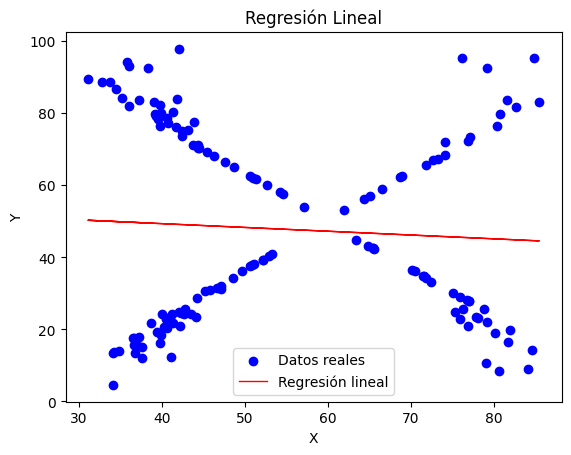

In [36]:
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x, y_pred, color='red', linewidth=1, label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### Regresion Polinomial

In [43]:
def graficarRMPolinomial(degree):
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(x)
    
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly, y)
    
    x_range = np.linspace(min(x.values), max(x.values), 100).reshape(-1, 1)
    
    X_poly_range = poly_reg.transform(x_range)
    
    y_pred_range = lin_reg2.predict(X_poly_range)
    
    plt.scatter(x, y, color='red', label='Datos reales')
    
    plt.plot(x_range, y_pred_range, color='blue', label=f'Función Polinomial (Grado {degree})')
    
    plt.title(f'Regresión Polinómica (Grado {degree})')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.legend()
    
    plt.show()

### Regresión Polinomial grado 4

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


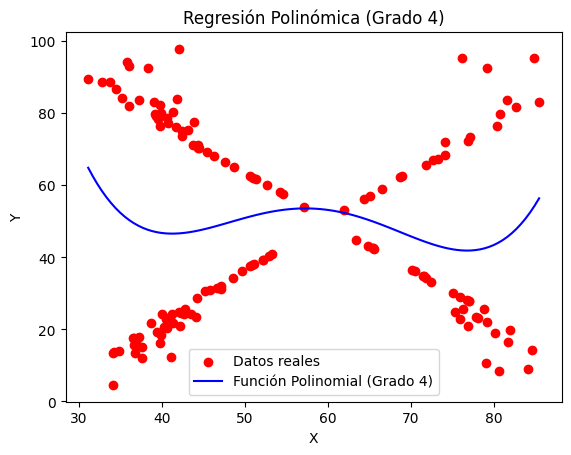

In [40]:
graficarRMPolinomial(4)

### Regresión Polinomial grado 6

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


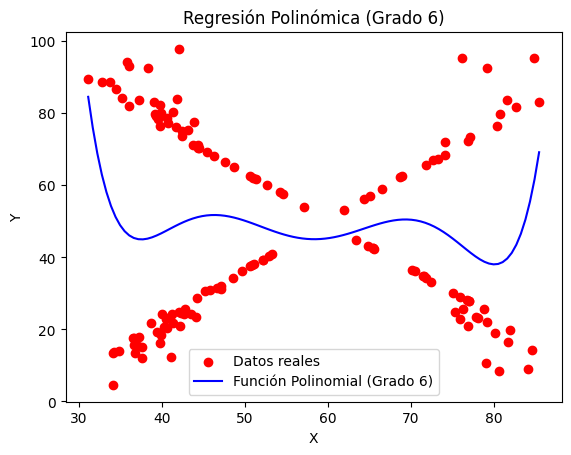

In [41]:
graficarRMPolinomial(6)

### Regresión Polinomial grado 8

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


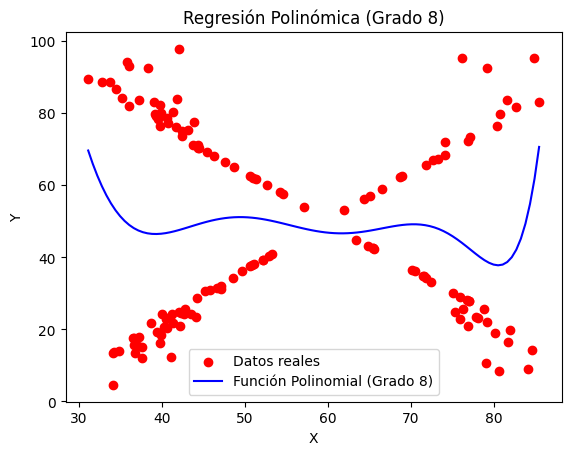

In [42]:
graficarRMPolinomial(8)

### Conclusiones
Podemos ver e identificar gracias al análisis patrones de los datos que no se notan a simple vista, demostrando que a veces patrones que pensamos estan ahi no lo estan, por lo que siempre es bueno realizar tanto un análisis descriptivo como una visualización y muy recomendablemente ver la tendencia de estos. y con esto lograriamos ver los patrones y entender los datos
 